In [2]:
from numpy.random import randn
from numpy.random import seed
from numpy import mean,std
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
pd.set_option('display.max_columns',60)
import re
from sklearn.preprocessing import StandardScaler

In [3]:
seed(1)

In [24]:

data1 = 5*randn(100) + 50
data2 = 5*randn(100) + 50
data3 = 5%randn(100) + 52

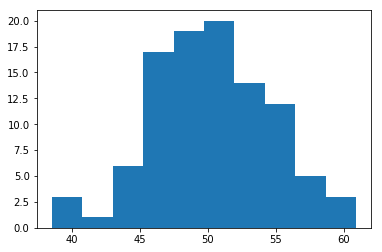

(array([ 1.,  4., 10.,  7., 23., 21., 19.,  9.,  3.,  3.]),
 array([38.82581118, 41.30739291, 43.78897465, 46.27055639, 48.75213812,
        51.23371986, 53.71530159, 56.19688333, 58.67846506, 61.1600468 ,
        63.64162853]),
 <a list of 10 Patch objects>)

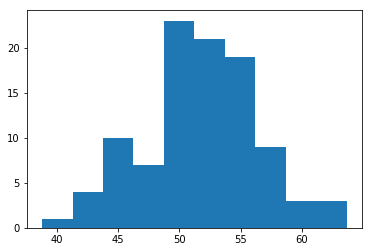

In [10]:
plt.hist(data1)
plt.show()
plt.hist(data2)

In [22]:
print('data1: mean= {0:0.3f} std dev = {1:0.3f}'.format(mean(data1),std(data1)))
print('data2: mean= {0:0.3f} std dev = {1:0.3f}'.format(mean(data2),std(data2)))

data1: mean= 50.303 std dev = 4.426
data2: mean= 51.764 std dev = 4.660


In [23]:
from scipy.stats import ttest_ind
ttest_ind(data1,data2) # to be used to find the significance and correlation when the samples are independent.

Ttest_indResult(statistic=-2.2620139704259556, pvalue=0.024782819014639627)

In [27]:
from scipy.stats import f_oneway
f_oneway(data1,data2,data3)

F_onewayResult(statistic=7.879528993563876, pvalue=0.0004630875548992357)

In [28]:
from statsmodels.graphics.gofplots import qqplot

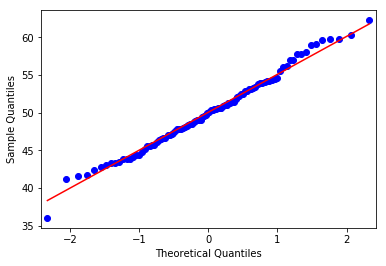

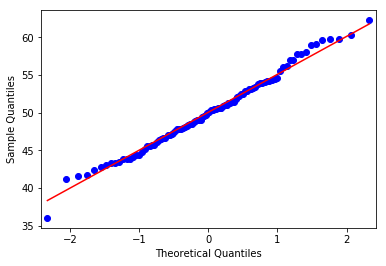

In [30]:
qqplot(data1,line='s')

In [120]:
Loan_copy=pd.read_pickle(r'C:\Users\Kazi\Desktop\Python Development\New Dev\Loan_Stat_ml_2.pickle')

In [121]:
Loan_copy.shape

(38708, 36)

In [122]:
Loan_copy['issue_d'] = Loan_copy['issue_d'].apply(lambda l : re.findall(r'[0-9]+',l)[0])

In [123]:
Loan_test_set=Loan_copy[Loan_copy.issue_d=='2008']
Loan_train_set = Loan_copy[Loan_copy.issue_d!='2008']

In [124]:
Loan_test_set.drop('issue_d',axis=1,inplace=True)
Loan_train_set.drop('issue_d',axis=1,inplace=True)

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


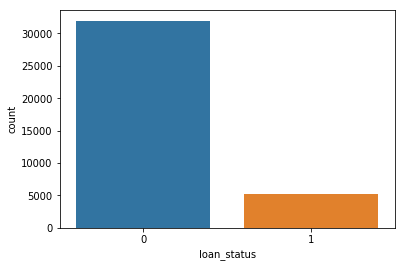

In [125]:
sns.countplot('loan_status',data=Loan_train_set)

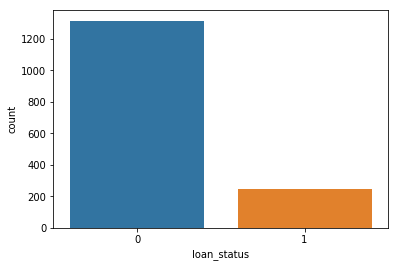

In [48]:
sns.countplot('loan_status',data=Loan_test_set)

In [9]:
std_scaler=StandardScaler()

In [10]:
train_set=std_scaler.fit_transform(Loan_train_set.drop('loan_status',axis=1))
test_set = std_scaler.transform(Loan_test_set.drop('loan_status',axis=1))

In [150]:
Loan_train_set.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'Not Verified', 'Source Verified', 'Verified', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [11]:
train_set = pd.DataFrame(train_set,columns=['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'Not Verified', 'Source Verified', 'Verified', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT'],index=Loan_train_set.index)

In [12]:
test_set = pd.DataFrame(test_set,columns=['loan_amnt', 'term','int_rate' ,'installment', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'Not Verified', 'Source Verified', 'Verified', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT'],index=Loan_test_set.index)

In [31]:
train_set['loan_status']=Loan_train_set['loan_status']
test_set['loan_status']=Loan_test_set['loan_status']

In [33]:
test_set.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,loan_status
37968,-1.355159,0.624447,-1.087213,-1.386832,-1.409596,-0.464624,-3.178923,-0.919277,1.718052,-0.656677,-0.502976,-0.393976,-0.281978,-0.167522,-0.092184,1.204135,-0.598558,-0.698728,-0.901846,-0.007338,22.851326,-0.281978,-0.952816,0
37969,-0.371174,0.624447,-0.222165,-0.219608,1.404853,-0.308749,-3.178923,-1.576828,-0.582055,1.522819,-0.502976,-0.393976,-0.281978,-0.167522,-0.092184,1.204135,-0.598558,-0.698728,1.108836,-0.007338,-0.043761,-0.281978,-0.952816,1
37970,0.479840,0.624447,0.197091,0.836238,0.279073,1.756591,-3.178923,1.096911,-0.582055,-0.656677,1.988165,-0.393976,-0.281978,-0.167522,-0.092184,-0.830472,-0.598558,1.431172,1.108836,-0.007338,-0.043761,-0.281978,-0.952816,0
37972,-0.450956,0.624447,0.029919,-0.296353,0.841963,-0.386687,-3.178923,1.274059,-0.582055,1.522819,-0.502976,-0.393976,-0.281978,-0.167522,-0.092184,1.204135,-0.598558,-0.698728,-0.901846,-0.007338,-0.043761,3.546372,-0.952816,0
37973,-1.115811,0.624447,-0.736948,-1.109389,-1.409596,-0.700681,-3.178923,0.694574,1.718052,-0.656677,-0.502976,-0.393976,-0.281978,-0.167522,-0.092184,1.204135,-0.598558,-0.698728,-0.901846,-0.007338,-0.043761,-0.281978,1.049521,0


In [14]:
train_set_pass = train_set[train_set['loan_status']==0]
train_set_fail = train_set[train_set['loan_status']==1]

In [76]:
train_set_fail.shape

(5193, 23)

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [115]:
smote=SMOTE(sampling_strategy='minority',k_neighbors=5)

In [126]:
X,y=smote.fit_resample(train_set.drop('loan_status',axis=1),train_set['loan_status'])
X=pd.DataFrame(X,columns=train_set.drop('loan_status',axis=1).columns)

In [127]:
X['loan_status']=y

In [317]:
Loan_train_set.shape

(37146, 35)

In [113]:
X['loan_status']=list(y)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',bootstrap=True,oob_score=True)

In [120]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
y_pred=rfc.predict(test_set.drop('loan_status',axis=1))

In [122]:
metrics.roc_auc_score(test_set['loan_status'],y_pred)

0.4991317867643663

In [123]:
rfc.oob_score_

0.8823271680280412

In [23]:
X_train= pd.DataFrame(X_train,columns=['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'Not Verified', 'Source Verified', 'Verified', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT'])

In [10]:
from sklearn.decomposition import PCA

In [83]:
Loan_copy.drop('loan_status',axis=1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'Not Verified', 'Source Verified', 'Verified', 'MORTGAGE', 'NONE',
       'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [11]:


def data_transform_pca(Loan_train_set,Loan_test_set,n_components=2,k_neighbours=5):
#     Loan_train_set.drop('issue_d',axis=1,inplace=True)
#     Loan_test_set.drop('issue_d',axis=1,inplace=True)
    smote=SMOTE(sampling_strategy='minority',k_neighbors=k_neighbours)
    X_train,y_train=smote.fit_resample(Loan_train_set.drop('loan_status',axis=1),Loan_train_set['loan_status'])
#     X_test,y_test=smote.fit_resample(Loan_test_set.drop('loan_status',axis=1),Loan_train_set['loan_status'])
    X_train = pd.DataFrame(X_train,columns=Loan_train_set.drop('loan_status',axis=1).columns)
#     X_test = pd.DataFrame(X_test,columns=Loan_test_set.drop('loan_status',axis=1).columns)
    std_scaler = StandardScaler()
    train_set=std_scaler.fit_transform(X_train)
    test_set = std_scaler.transform(Loan_test_set.drop('loan_status',axis=1))
    pca = PCA(n_components=n_components)
    X_pca_train=pd.DataFrame(pca.fit_transform(train_set))
    X_pca_train['loan_status']=y_train
    X_pca_test=pd.DataFrame(pca.transform(test_set))
    X_pca_test['loan_status']=Loan_test_set.loan_status.values
    return X_pca_train,X_pca_test

In [200]:
X_pca_train,X_pca_test = data_transform_pca(Loan_train_set,Loan_test_set,n_components=19,k_neighbours=7) #19,13 for balanced  # 19,7 for without balance

In [156]:
scores={}

In [190]:
for i in range(5,20):
    for j in range(5,20):
#         print('Components ',i)
#         print('Neighbours',j)
        X_pca_train,X_pca_test = data_transform_pca(Loan_train_set,Loan_test_set,n_components=i,k_neighbours=j)
        log_reg = LogisticRegression(penalty='l2',solver='lbfgs')
        log_reg.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
        y_pred_log=log_reg.predict(X_pca_test.drop('loan_status',axis=1))
        scores[(i,j)]=metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_log)
        #print(metrics.classification_report(X_pca_test['loan_status'],y_pred_log))
        print

In [191]:
scores_balanced = scores

In [192]:
max(list(scores_balanced.values()))

0.9708886870583889

In [193]:
[keys for keys,values in scores_balanced.items() if values == max(list(scores_balanced.values()))]

[(19, 7)]

In [183]:
scores_balanced.get(0.9688643955604131)

In [ ]:
scores_W_balanced = scores

In [39]:
Reject_Stat=pd.read_csv(r'E:\personal_kazi\bajaj_finserv\RejectStatsA.csv\RejectStatsA.csv',skiprows=1)
Reject_Stat.drop(['Application Date','Loan Title','Risk_Score','Zip Code','State','Policy Code'],axis=1,inplace=True)
Reject_Stat=Reject_Stat[~Reject_Stat['Employment Length'].isnull()]
Reject_Stat.columns=['loan_amnt','dti','emp_length']
Reject_Stat['emp_length']=['0' if len=="< 1 year" else len for len in Reject_Stat['emp_length']]
Reject_Stat['emp_length']=Reject_Stat['emp_length'].apply(lambda l:int(re.findall(r'[0-9]+',l)[0]))
Reject_Stat['dti']=Reject_Stat['dti'].apply(lambda l:int(re.findall(r'[0-9]+',l)[0]))

In [40]:
Reject_Stat.head()

,loan_amnt,dti,emp_length
0,1000.0,10,4
1,1000.0,10,0
2,11000.0,10,1
3,6000.0,38,0
4,1500.0,9,0


In [42]:
Reject_Stat['loan_status'] = np.ones(Reject_Stat.shape[0])

In [56]:
train_set1=Loan_train_set[Reject_Stat.columns]

In [57]:
train_set1.loan_status.value_counts()[0] - train_set1.loan_status.value_counts()[1]

26760

In [55]:
from sklearn.utils import resample


seed=1
train_set2 = resample(Reject_Stat,replace=False,n_samples=26760,random_state=seed)

In [68]:
train_set=pd.concat([train_set1,train_set2])

In [71]:
train_set['loan_status']=train_set['loan_status'].astype('int32')

In [72]:
train_set.head()

,loan_amnt,dti,emp_length,loan_status
0,5000.0,27.65,10,0
1,2500.0,1.00,0,1
2,2400.0,8.72,10,0
3,10000.0,20.00,10,0
4,3000.0,17.94,1,0


In [93]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
tr_set=std_scaler.fit_transform(train_set.drop('loan_status',axis=1))
te_set = std_scaler.transform(Loan_test_set[train_set.columns].drop('loan_status',axis=1))

In [96]:
pca = PCA(n_components=2)
X_pca_train=pd.DataFrame(pca.fit_transform(tr_set))
X_pca_train['loan_status']=train_set['loan_status'].values
X_pca_test=pd.DataFrame(pca.transform(te_set))
X_pca_test['loan_status']=Loan_test_set.loan_status.values

In [75]:
X_pca_train = train_set
X_pca_test = Loan_test_set[train_set.columns]

In [202]:
from sklearn.svm import SVC

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost
from sklearn.svm import SVC

p = Pipeline([
#     ('svc',SVC(kernel='linear')),
    ('log_reg',gsv.best_estimator_)
])
# xgbc=xgboost.XGBClassifier(learning_rate=0.1,n_estimators=200)
# xgbr = xgboost.XGBRFClassifier(learning_rate=0.1,n_estimators=200)
# rfc = RandomForestClassifier(n_estimators=200,bootstrap=True,oob_score=True)
# log_reg = LogisticRegression(penalty='l2',solver='lbfgs')
# log_reg.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
# y_pred_log=log_reg.predict(X_pca_test.drop('loan_status',axis=1))
# print('logreg results auc score',metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_log))
# print(metrics.classification_report(X_pca_test['loan_status'],y_pred_log))

# print('random forrest output')
# rfc.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
# y_pred_rfc=rfc.predict(X_pca_test.drop('loan_status',axis=1))
# print(metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_rfc))
# print(metrics.classification_report(X_pca_test['loan_status'],y_pred_rfc))

# print('xgb classifier')

# xgbc.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
# y_pred_xgbc=xgbc.predict(X_pca_test.drop('loan_status',axis=1))
# print(metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_xgbc))
# print(metrics.classification_report(X_pca_test['loan_status'],y_pred_xgbc))

# print('xgb random classifier')

# xgbr.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
# y_pred_xgbr=xgbr.predict(X_pca_test.drop('loan_status',axis=1))
# print(metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_xgbr))
# print(metrics.classification_report(X_pca_test['loan_status'],y_pred_xgbr))

# print('Support Vector classification')

# svc = SVC(kernel='linear')
# svc.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
# y_pred_svc=svc.predict(X_pca_test.drop('loan_status',axis=1))
# print(metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_svc))
# print(metrics.classification_report(X_pca_test['loan_status'],y_pred_svc))
X=X_pca_train.drop('loan_status',axis=1)
y=y=X_pca_train['loan_status']


In [302]:
p

Pipeline(memory=None,
         steps=[('log_reg',
                 LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [301]:
cross_val_score(estimator=p,X=X,y=y,cv=3,n_jobs=-1,scoring='roc_auc')

C:\Users\Kazi\Anaconda3\lib\site-packages\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\Kazi\AppData\Local\Temp\joblib_memmapping_folder_28024_1564006605 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Kazi\\AppData\\Local\\Temp\\joblib_memmapping_folder_28024_1564006605\\28024-2223492144544-2d1feb19bdb94310acc0d53f753c73ff.pkl'

In [286]:
stack_op_test=pd.concat([pd.Series(gsv.predict(X_pca_test.drop('loan_status',axis=1))),pd.Series(y_pred_svc),X_pca_test['loan_status']],axis=1)

In [287]:
stack_op_train = pd.concat(
    [pd.Series(gsv.predict(X_pca_train.drop('loan_status',axis=1))),
#      pd.Series(log_reg.predict(X_pca_train.drop('loan_status',axis=1))),
     pd.Series(rfc.predict(X_pca_train.drop('loan_status',axis=1))),
     X_pca_train['loan_status']],axis=1,
)

In [148]:
stack_op_test = stack_op

In [289]:
stack_op_train.isnull().any()

0              False
1              False
loan_status    False
dtype: bool

In [290]:
log_reg_op = LogisticRegression(penalty='l2',solver='lbfgs')
# log_reg_op.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
log_reg_op.fit(stack_op_train[[0,1]],stack_op_train['loan_status'].values)
y_pred=log_reg_op.predict(stack_op_test[[0,1]])
print('logreg results auc score',metrics.roc_auc_score(stack_op_test['loan_status'],y_pred))
print(metrics.classification_report(stack_op_test['loan_status'],y_pred))

logreg results auc score 0.9740536629670109
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1315
           1       0.94      0.96      0.95       247

    accuracy                           0.98      1562
   macro avg       0.97      0.97      0.97      1562
weighted avg       0.98      0.98      0.98      1562



In [242]:
from sklearn.model_selection import GridSearchCV

In [312]:
param_grid={
    'class_weight':['balanced','auto'],
    'C':[0.1,0.2,0.3,0.4,0.5,0.6],
    'max_iter' :[100,150,175,200],
    'penalty':['none','l2'],
}

In [ ]:
LogisticRegression()

In [313]:
gsv=GridSearchCV(log_reg,cv=5,param_grid=param_grid)

In [314]:
gsv.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'class_weight': ['balanced', 'auto'],
                         'max_iter': [100, 150, 175, 200],
                         'penalty': ['none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ve

In [315]:
metrics.roc_auc_score(X_pca_test['loan_status'],gsv.predict(X_pca_test.drop('loan_status',axis=1)))

0.971268915195271

In [316]:
gsv.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [284]:
log_best=gsv.best_estimator_
log_best.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])
y_pred_log=log_best.predict(X_pca_test.drop('loan_status',axis=1))
print('logreg results auc score',metrics.roc_auc_score(X_pca_test['loan_status'],y_pred_log))
print(metrics.classification_report(X_pca_test['loan_status'],y_pred_log))

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


logreg results auc score 0.971268915195271
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1315
           1       0.93      0.96      0.94       247

    accuracy                           0.98      1562
   macro avg       0.96      0.97      0.97      1562
weighted avg       0.98      0.98      0.98      1562



In [188]:
rfc.fit(X_pca_train.drop('loan_status',axis=1),X_pca_train['loan_status'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_pred=rfc.predict(X_pca_test.drop('loan_status',axis=1))

In [195]:
metrics.roc_auc_score(X_pca_test['loan_status'],y_pred)

0.5042948846230816

In [180]:
Loan_train_set['loan_status'].isnull().any()

False

In [181]:
X_pca_train

0              0.087839
1              0.783790
2             -1.556848
loan_status         NaN
Name: 168, dtype: float64